<a href="https://colab.research.google.com/github/MyDearGreatTeacher/AI4high/blob/master/TF_fractals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 使用TensorFlow求解fractals

深度學習快速入門—使用 TensorFlow (Getting started with TensorFlow) 

Giancarlo Zaccone

博碩 2017-01-10


Chapter 2  用TensorFlow求解數學問題:複數及碎形（fractals）

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


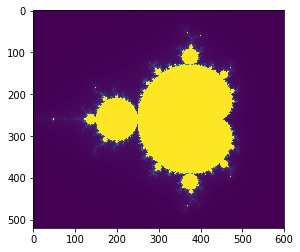

In [2]:
#Import libraries for simulation
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
     



#MANDELBROT SET
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]

#JULIA SET
#Y, X = np.mgrid[-2:2:0.005, -2:2:0.005]

#Definiamo il punto corrente 
Z = X+1j*Y
c = tf.constant(Z.astype("complex64"))

zs = tf.Variable(c)
ns = tf.Variable(tf.zeros_like(c, "float32"))

#c = complex(0.0,0.75)
#c = complex(-1.5,-1.5)
sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

# Compute the new values of z: z^2 + x
zs_ = zs*zs + c
#zs_ = zs*zs - c

# Have we diverged with this new value?
#not_diverged = tf.complex_abs(zs_) < 4
not_diverged = tf.abs(zs_) < 4

step = tf.group(
  zs.assign(zs_),
  ns.assign_add(tf.cast(not_diverged, "float32"))
  )

for i in range(200): step.run()

plt.imshow(ns.eval())
plt.show()







